In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [175]:
def read(input):
    # df = pd.read_csv(input, parse_dates=True, infer_datetime_format=True)  # use if there's only one date/time column
    try:
        df = pd.read_csv(input, parse_dates={'Datetime': [0, 1]},
                     infer_datetime_format=True)  # merges time and date columns
    except:
        df = pd.read_csv(input, names=["Time Series"])
    # print(df.head)
    return df


def denoise(ts: pd.DataFrame) -> None:
    """
    Removes noise from a time series. Produces a time series with less noise than
    the original one. This function can be implemented using moving (or rolling) media or median
    (included in the Pandas library.)
    """
    # Implementing 5 point moving average
    ts["Time Series"] = ts.rolling(window=5).mean()
    
def logarithm(ts):
    """
    Produces a time series whose elements are the logarithm of the original
    elements.
    """
    ts["Time Series"] = ts.apply(lambda x: math.log(x, 2))

In [176]:
df = read("../timeSeriesData/1_temperature_test.csv")
df.head(10)
#df.plot(linewidth=2)

,Time Series
0,28.4
1,28.3
2,26.6
3,25.3
4,24.2
5,23.7
6,23.4
7,23.2
8,22.8
9,22.7


In [177]:
logarithm(df)
df.head(10)
#df.plot(linewidth=2)

TypeError: cannot convert the series to <class 'float'>

<AxesSubplot:>

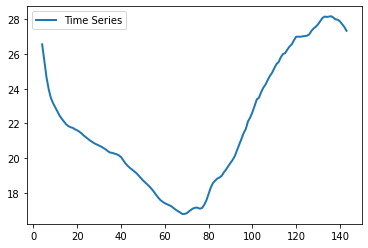

In [178]:
denoise(df)
df.head(10)
df.plot(linewidth=2)